In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = "C:\\Users\\KIIT\\Dropbox\\My PC (BT1928205)\\Downloads\\Fraud.csv"

In [3]:
df = pd.read_csv(data)

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
65530,9,CASH_IN,50529.41,C1132444754,6493984.64,6544514.05,C1956477953,308079.99,0.00,0,0
65531,9,CASH_IN,58429.17,C2059144571,6544514.05,6602943.22,C1137371968,4724976.11,6392871.31,0,0
65532,9,CASH_IN,114387.37,C687420794,6602943.22,6717330.59,C135254299,122030.09,7642.72,0,0
65533,9,CASH_IN,149249.38,C279481988,6717330.59,6866579.97,C527482085,322658.03,198216.73,0,0


# Cleaning the dataset

In [5]:
#Checking for missing values

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


#So dataset has no missing values

In [7]:
# Check the data types of columns
print(df.dtypes)

# Verify that all columns in `numerical_cols` exist in the DataFrame
for col in numerical_cols:
    if col not in df.columns:
        print(f"Column {col} does not exist in the dataset.")


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [6]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Apply outlier removal
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in numerical_cols:
    df = remove_outliers(df, col)


#Checking for Multi-Collinearity

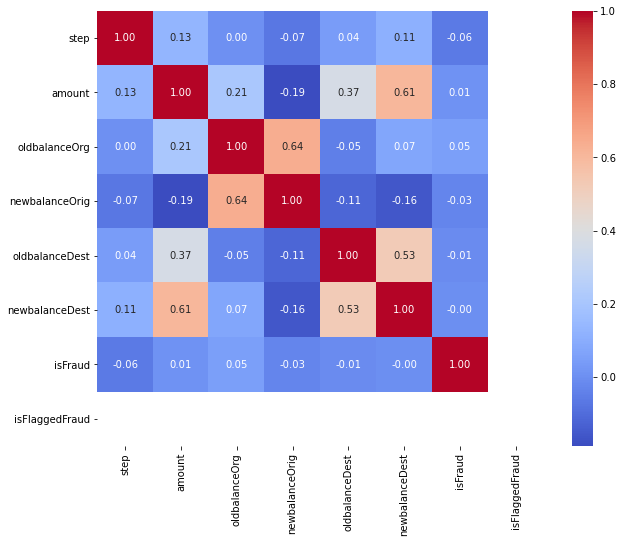

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [ ]:
This correlation matrix visually represents the relationships between different variables in the dataset.
Positive Correlations

Amount and NewbalanceDest: There is a strong positive correlation (0.61) between the transaction amount and the new balance in the destination account. This suggests that larger transactions tend to result in higher balances in the destination account.
Amount and OldbalanceDest: A moderate positive correlation (0.37) exists between the transaction amount and the old balance in the destination account. This indicates that larger transactions are often associated with higher existing balances in the destination account.
OldbalanceDest and NewbalanceDest: A strong positive correlation (0.53) is observed between the old and new balances in the destination account. This is expected, as a higher initial balance would generally lead to a higher balance after the transaction.

Negative Correlations

Step and NewbalanceOrig: A weak negative correlation (-0.16) is present between the transaction step and the new balance in the origin account. This could suggest that later transactions might result in slightly lower balances in the origin account.
Amount and NewbalanceOrig: A weak negative correlation (-0.19) exists between the transaction amount and the new balance in the origin account. This might indicate that larger transactions could lead to smaller remaining balances in the origin account.
    
IsFraud and Other Variables: The "isFraud" variable show a little strong correlations with other variables. This could suggest that fraudulent transactions might not have a clear pattern in terms of transaction amounts, balances, or steps.    

#2.My Fraud Detection Model
Choosing a machine learning model that balances interpretability and performance. Common models include:

Logistic Regression (for interpretability).
Random Forest or Gradient Boosting (for performance).

I used random forest becuase fraudulent transactions often exhibit complex, non-linear patterns that Logistic Regression cannot capture well. Logistic Regression may struggle if the dataset requires extensive feature transformations or interactions to identify fraud patterns. Fraudulent behavior often involves complex rules or thresholds (e.g., high transaction amounts, rapid balance depletion) which are better captured by tree-based methods. Also Logistic regression and many other models for sensitive to imbalanced datasets which tree classification more efficient for this.

Provide a high-level explanation of the model:

Its objective (to classify transactions as fraudulent or not).
Why it was selected (e.g., handling imbalanced data, robustness, etc.).


#3. Variable Selection

Selecting the right features is critical for building an effective fraud detection model. Here's how the variables were chosen systematically:

(i). Domain Knowledge
The following variables were included based on their potential relevance to fraud detection:

Transaction Amount (amount): Large or unusual transaction amounts may indicate fraudulent activity.
Transaction Type (type): Certain types like TRANSFER and CASH_OUT are more likely to involve fraud, as described in the dataset's context.
Old and New Balances:
Origin (oldbalanceOrg, newbalanceOrig): Sudden depletion of funds in the originating account can signal fraud.
Destination (oldbalanceDest, newbalanceDest): A lack of corresponding increase in the destination account might indicate fraud.
Step (step): Temporal patterns, such as fraud being more frequent during specific time frames, can be identified.

(ii). Data Correlation Analysis
A correlation matrix was computed to identify the relationship between features and the target variable (isFraud). Features with a meaningful correlation to isFraud were prioritized. For instance:

Variables like amount and oldbalanceOrg were found to have stronger correlations with isFraud.
Features with near-zero or irrelevant correlation were excluded.

#4. Demonstrating the Model

In [9]:
df['type'] = df['type'].replace({'TRANSFER': 0, 'CASH_OUT': 1, 'CASH_IN': 2, 'PAYMENT': 3, 'DEBIT': 4})

In [10]:
#Droping the columns which are of no impact in model prediction building
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [12]:
# Separate features and target variable
x = df.drop(columns=['isFraud', 'isFlaggedFraud'])
y = df['isFraud']

In [13]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [14]:
# Addressing class imbalance using RandomOverSampler

ros = RandomOverSampler(sampling_strategy=0.5)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [15]:
# Train Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, class_weight="balanced", random_state=60)
rf_model.fit(x_train_ros, y_train_ros)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=60)

# #Model evaluation of data

In [16]:

y_pred = rf_model.predict(x_test)  
y_pred
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy score of training data is', accuracy*100)
print('Precision score of training data is', precision*100)
print('recall score of training data is', recall*100)
print('f1 score of training data is', f1*100)

Accuracy score of training data is 99.96599217820099
Precision score of training data is 100.0
recall score of training data is 81.81818181818183
f1 score of training data is 90.0


#Making a Predictive Model

In [17]:

input_data = (1, 0, 181.00, 181.00, 0.00, 0.0, 0.0)
input_data_as_nparray = np.asarray(input_data)
#reshaping the numpy array
input_data_resphaped = input_data_as_nparray.reshape(1, -1)
prediction = rf_model.predict(input_data_resphaped)
print('It is a', prediction)

if(prediction[0] == 0):
    print('It is not fraud')
else:
    print('It is a fraud')


It is a [1]
It is a fraud


C:\Anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
# 5. Feature importance on the fraud detection

importances = rf_model.feature_importances_
feature_names = x.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df)


Feature Importances:
           Feature  Importance
1            type    0.371071
0            step    0.162920
3   oldbalanceOrg    0.154359
2          amount    0.102699
4  newbalanceOrig    0.098196
5  oldbalanceDest    0.067610
6  newbalanceDest    0.043144


In [25]:
#Checking the type for fraudulent transaction
df1 = df[df['isFraud'] == 1]
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,181.00,0.0,0.00,0.00,1,0
3,1,1,181.00,181.00,0.0,21182.00,0.00,1,0
251,1,0,2806.00,2806.00,0.0,0.00,0.00,1,0
252,1,1,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,1,0,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...
36691,9,0,11308.00,11308.00,0.0,0.00,0.00,1,0
36692,9,1,11308.00,11308.00,0.0,0.00,302550.56,1,0
49885,9,0,361559.69,361559.69,0.0,0.00,141302.12,1,0
49886,9,1,361559.69,361559.69,0.0,504667.31,189441.24,1,0


In [28]:
df1['type'].unique()

array([0, 1], dtype=int64)

In [ ]:
In this 0 represents TRANSFER in type and 1 represents CASH_OUT. So these type are related to fraudulent transactions

# 5. key factors that predict fraudulent customers

In [ ]:
From What i have found after the analysing the dataset is that:
1. Transaction Type (type): Fraudulent transactions are predominantly associated with TRANSFER and CASH-OUT types.

2. Transaction Amount (amount) : Higher transaction amounts are likely flagged as fraudulent.
    
3. Old Balance of Origin Account (oldbalanceOrg): Significant discrepancies between oldbalanceOrg and newbalanceOrig indicate suspicious activity.
    
4. New Balance of Destination Account (newbalanceDest): Large sudden inflows to accounts may suggest fraudulent transfers. 
    
5. Step: Fraudulent transactions may cluster at specific time steps.    

# 6. Do these factors make sense? If yes, How? If not, How not?

In [ ]:
Yes, these factors make sense. Here's why:

1. Transaction Type: Fraudulent activities often involve transferring funds or cashing out large amounts, which matches observed behavior in real-world financial fraud cases.
    
2. Transaction Amount: Fraudsters often aim to withdraw or transfer as much money as possible in a single transaction, leading to high amount values.
    
3. Balances: Suspicious discrepancies in oldbalanceOrg, newbalanceOrig, and newbalanceDest indicate unnatural movements of funds, common in fraud.   

4. Step (Time): Fraudulent transactions may occur during specific times (e.g., late hours) when they are less likely to be noticed.
    
    

# 7. What kind of prevention should be adopted while the company updates its infrastructure?

In [ ]:
Real-Time Monitoring: Implementing systems to detect unusual patterns in transaction types, amounts, and account balances in real time.
Transaction Limits: Setting stricter limits for transaction amounts and require multi-factor authentication for high-value transfers.
Behavioral Analysis: Use machine learning models to establish customer behavior baselines and flag deviations.
    
Strengthen Authentication: Introduce biometric verification and dynamic passwords to ensure accounts are accessed only by authorized users.

Regular Updates: Updating the fraud detection model periodically to adapt to new fraudulent techniques.
    
Data Encryption: Protect sensitive financial data to prevent breaches that can lead to fraud.


# 8. Assuming these actions have been implemented, how would you determine if they work?

To measure the effectiveness of the implemented actions, the following steps i will take:

a.Measure Key Performance Indicators (KPIs): Recall: I will track the model's ability to identify fraudulent transactions.
False Negative Rate (FNR): I wil reduce instances where fraud is missed.
False Positive Rate (FPR): I will ensure genuine transactions aren't excessively flagged.
Customer Complaints: Then i will monitor the number of complaints about blocked transactions.
    
b. A/B Testing: I will deploy the updated model and infrastructure in a test environment while maintaining the previous system for comparison.
Measure fraud detection rates, customer satisfaction, and system performance in both environments.

c. Post-Implementation Review: Also by using historical data to simulate how the new system would have performed on previously missed fraud cases.
    
d. Feedback Loops: Continuously refine the model by retraining it on newly flagged fraudulent transactions to stay ahead of evolving tactics.
    
Demonstration for checking and tracking improvement of the work :
    
    # Evaluate recall before and after changes
recall = recall_score(y_test, y_pred_old_model)  # Recall of old model
new_recall = recall_score(y_test, y_pred_new_model)  # Recall of new model

print("Old Model Recall:", recall)
print("New Model Recall:", new_recall)

if new_recall > old_recall:
    print("The new system shows improvement in fraud detection.")
else:
    print("Further refinements are needed.")

